In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
articles = pd.read_pickle("./data/articles_from_journals_full.pkl")

In [24]:
articles["concepts"]

0        [{'id': 'https://openalex.org/C86803240', 'wik...
1        [{'id': 'https://openalex.org/C86803240', 'wik...
2        [{'id': 'https://openalex.org/C2909880533', 'w...
3        [{'id': 'https://openalex.org/C2776447534', 'w...
4        [{'id': 'https://openalex.org/C70343354', 'wik...
                               ...                        
58955    [{'id': 'https://openalex.org/C62360110', 'wik...
58956    [{'id': 'https://openalex.org/C2780614885', 'w...
58957    [{'id': 'https://openalex.org/C71640776', 'wik...
58958    [{'id': 'https://openalex.org/C2779878721', 'w...
58959    [{'id': 'https://openalex.org/C41008148', 'wik...
Name: concepts, Length: 58960, dtype: object

In [16]:
n_taxon = 0
n_taxonomy = 0
n_bioclass = 0
n_tax = 0

for article in articles.itertuples():
    taxon = False
    taxonomy = False
    bioclass = False
    
    for concept in article.concepts:
        if concept["id"] == "https://openalex.org/C71640776":
            taxon = True
        elif concept["id"] == "https://openalex.org/C58642233":
            taxonomy = True
        elif concept["id"] == "https://openalex.org/C48702757":
            bioclass = True
            
    if taxon:
        n_taxon += 1
    if taxonomy:
        n_taxonomy += 1
    if bioclass:
        n_bioclass += 1
    if taxon or taxonomy:
        n_tax += 1

In [17]:
n_taxon

6939

In [18]:
n_taxonomy

20387

In [19]:
n_bioclass

5

In [20]:
n_tax

23736

In [25]:
articles.columns

Index(['id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'host_venue', 'type', 'open_access',
       'authorships', 'cited_by_count', 'biblio', 'is_retracted',
       'is_paratext', 'concepts', 'mesh', 'alternate_host_venues',
       'referenced_works', 'related_works', 'ngrams_url',
       'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year',
       'updated_date', 'created_date', 'is_authors_truncated', 'host_id',
       'issn_l', 'issn', 'host_display_name', 'publisher', 'host_type',
       'host_url', 'is_host_oa', 'host_version', 'host_license', 'is_oa',
       'oa_status', 'oa_url'],
      dtype='object')

In [50]:
n_taxon = {}
n_taxonomy = {}
n_bioclass = {}
n_tax = {}
n_total = {}

for journal in set(articles["host_display_name"]):
    journal_articles = articles[articles["host_display_name"]==journal]
    
    n_total[journal] = len(journal_articles.index)
    
    n_taxon[journal] = 0
    n_taxonomy[journal] = 0
    n_bioclass[journal] = 0
    n_tax[journal] = 0
    
    for article in journal_articles.itertuples():
        taxon = False
        taxonomy = False
        bioclass = False

        for concept in article.concepts:
            if concept["id"] == "https://openalex.org/C71640776":
                taxon = True
            elif concept["id"] == "https://openalex.org/C58642233":
                taxonomy = True
            elif concept["id"] == "https://openalex.org/C48702757":
                bioclass = True

        if taxon and not taxonomy:
            n_taxon[journal] += 1
        if taxonomy and not taxon:
            n_taxonomy[journal] += 1
        elif taxon and taxonomy:
            n_tax[journal] += 1
        
        if bioclass:
            n_bioclass[journal] += 1

In [51]:
n_bioclass

{'European journal of taxonomy': 0,
 'Zootaxa': 0,
 'Graellsia': 0,
 'Journal of Systematics and Evolution': 0,
 'Molecular Phylogenetics and Evolution': 1,
 'ZooKeys': 2,
 'Kew Bulletin': 0,
 'Insect systematics and diversity': 0,
 'Australian Systematic Botany': 0,
 'Zoosystematics and Evolution': 0,
 'Native Plants Journal': 0,
 'The Auk': 0,
 'PhytoKeys': 0,
 'Phytotaxa': 0,
 'Bionomina': 0,
 'Zoologica Scripta': 0,
 'Systematic Entomology': 0,
 'Animal Systematics, Evolution and Diversity': 0,
 'Nuytsia': 0,
 'NeoBiota': 0,
 'The Bulletin of zoological nomenclature': 0,
 'Megataxa': 0,
 'Korean Journal of Plant Taxonomy': 0,
 'Willdenowia': 0,
 'Taxon': 0,
 'Russian entomological journal': 0,
 'Systematic Biology': 2,
 'Singmulbullyuhakoeji': 0}

In [48]:
data_plot = pd.DataFrame({"both":n_tax, "taxon":n_taxon, "taxonomy":n_taxonomy, "total":n_total})
data_plot

,both,taxon,taxonomy,total
European journal of taxonomy,103,54,526,1140
Zootaxa,1080,1107,7618,25994
Graellsia,5,7,7,229
Journal of Systematics and Evolution,5,49,38,859
Molecular Phylogenetics and Evolution,126,460,232,3138
ZooKeys,258,207,2189,5302
Kew Bulletin,34,35,143,653
Insect systematics and diversity,13,17,23,142
Australian Systematic Botany,60,17,129,269
Zoosystematics and Evolution,14,18,58,279


In [53]:
data_plot["both_perc"] = data_plot["both"] / data_plot["total"]
data_plot["taxon_perc"] = data_plot["taxon"] / data_plot["total"]
data_plot["taxonomy_perc"] = data_plot["taxonomy"] / data_plot["total"]

data_plot

,both,taxon,taxonomy,total,both_perc,taxon_perc,taxonomy_perc
European journal of taxonomy,103,54,526,1140,0.090351,0.047368,0.461404
Zootaxa,1080,1107,7618,25994,0.041548,0.042587,0.293068
Graellsia,5,7,7,229,0.021834,0.030568,0.030568
Journal of Systematics and Evolution,5,49,38,859,0.005821,0.057043,0.044237
Molecular Phylogenetics and Evolution,126,460,232,3138,0.040153,0.146590,0.073932
ZooKeys,258,207,2189,5302,0.048661,0.039042,0.412863
Kew Bulletin,34,35,143,653,0.052067,0.053599,0.218989
Insect systematics and diversity,13,17,23,142,0.091549,0.119718,0.161972
Australian Systematic Botany,60,17,129,269,0.223048,0.063197,0.479554
Zoosystematics and Evolution,14,18,58,279,0.050179,0.064516,0.207885


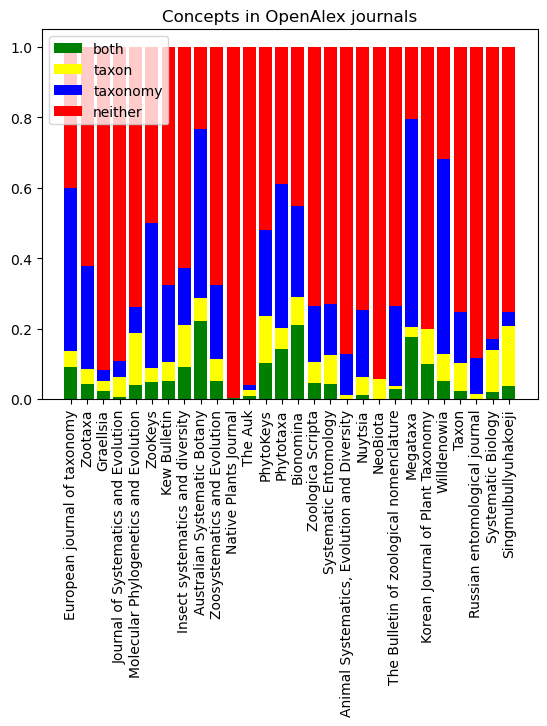

<Figure size 640x480 with 0 Axes>

In [75]:
# labels = list(n_taxon.keys())
fig, ax = plt.subplots()

ax.bar(labels, data_plot["both_perc"],
       label="both", color="green")
ax.bar(labels, data_plot["taxon_perc"], bottom=data_plot["both_perc"],
       label="taxon", color="yellow")
ax.bar(labels, data_plot["taxonomy_perc"], bottom=data_plot["both_perc"]+data_plot["taxon_perc"],
       label="taxonomy", color="blue")
ax.bar(labels, 1-data_plot["both_perc"]-data_plot["taxon_perc"]-data_plot["taxonomy_perc"], 
       bottom=data_plot["both_perc"]+data_plot["taxon_perc"]+data_plot["taxonomy_perc"],
       label="neither", color="red")

ax.legend()

plt.title("Concepts in OpenAlex journals")
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.show()

plt.savefig("./figures/absolute_oa_status_journals.png")

In [77]:
eujot = articles[articles["host_display_name"]=="European journal of taxonomy"]
eujot

,id,doi,title,display_name,publication_year,publication_date,ids,host_venue,type,open_access,...,host_display_name,publisher,host_type,host_url,is_host_oa,host_version,host_license,is_oa,oa_status,oa_url
39580,https://openalex.org/W2012719615,https://doi.org/10.5852/ejt.2013.45,A review of the tribes of Deltocephalinae (Hem...,A review of the tribes of Deltocephalinae (Hem...,2013,2013-05-29,{'openalex': 'https://openalex.org/W2012719615...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,http://www.europeanjournaloftaxonomy.eu/index....,True,publishedVersion,cc-by,True,gold,http://www.europeanjournaloftaxonomy.eu/index....
39581,https://openalex.org/W2590646912,https://doi.org/10.5852/ejt.2017.283,Pitfalls in supermatrix phylogenomics,Pitfalls in supermatrix phylogenomics,2017,2017-02-21,{'openalex': 'https://openalex.org/W2590646912...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
39582,https://openalex.org/W2912928817,https://doi.org/10.5852/ejt.2019.492,A subjective global checklist of the extant no...,A subjective global checklist of the extant no...,2019,2019-01-25,{'openalex': 'https://openalex.org/W2912928817...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
39583,https://openalex.org/W2943376723,https://doi.org/10.5852/ejt.2019.522,Micro-computed tomography for natural history ...,Micro-computed tomography for natural history ...,2019,2019-04-30,{'openalex': 'https://openalex.org/W2943376723...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
39584,https://openalex.org/W3134065662,https://doi.org/10.5852/ejt.2021.736.1257,An updated classification of the jumping plant...,An updated classification of the jumping plant...,2021,2021-03-05,{'openalex': 'https://openalex.org/W3134065662...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40715,https://openalex.org/W4313357885,https://doi.org/10.5852/ejt.2022.855.2023,A new genus for two species of Japanese firefl...,A new genus for two species of Japanese firefl...,2022,2022-12-30,{'openalex': 'https://openalex.org/W4313357885...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,"{'is_oa': True, 'oa_status': 'gold', 'oa_url':...",...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
40716,https://openalex.org/W4313908321,https://doi.org/10.5852/ejt.2023.856.2025,New nematode species and genera (Nematoda: Chr...,New nematode species and genera (Nematoda: Chr...,2023,2023-01-1

In [91]:
eujot_no_concept = []
eujot_concept = []

for article in eujot.itertuples():
    tax = False
    for concept in article.concepts:
        if concept["id"] == "https://openalex.org/C71640776" or concept["id"] == "https://openalex.org/C58642233":
            tax = True
    
    if tax:
        eujot_concept.append(article)
    else:
        eujot_no_concept.append(article)

eujot_no_concept = pd.DataFrame(eujot_no_concept)
eujot_concept = pd.DataFrame(eujot_concept)

In [93]:
eujot_no_concept

,Index,id,doi,title,display_name,publication_year,publication_date,ids,host_venue,type,...,host_display_name,publisher,host_type,host_url,is_host_oa,host_version,host_license,is_oa,oa_status,oa_url
0,39581,https://openalex.org/W2590646912,https://doi.org/10.5852/ejt.2017.283,Pitfalls in supermatrix phylogenomics,Pitfalls in supermatrix phylogenomics,2017,2017-02-21,{'openalex': 'https://openalex.org/W2590646912...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
1,39583,https://openalex.org/W2943376723,https://doi.org/10.5852/ejt.2019.522,Micro-computed tomography for natural history ...,Micro-computed tomography for natural history ...,2019,2019-04-30,{'openalex': 'https://openalex.org/W2943376723...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
2,39584,https://openalex.org/W3134065662,https://doi.org/10.5852/ejt.2021.736.1257,An updated classification of the jumping plant...,An updated classification of the jumping plant...,2021,2021-03-05,{'openalex': 'https://openalex.org/W3134065662...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
3,39585,https://openalex.org/W1982061791,https://doi.org/10.5852/ejt.2015.120,Contributions to the knowledge of Formicidae (...,Contributions to the knowledge of Formicidae (...,2015,2015-04-20,{'openalex': 'https://openalex.org/W1982061791...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,http://www.europeanjournaloftaxonomy.eu/index....,True,publishedVersion,cc-by,True,gold,http://www.europeanjournaloftaxonomy.eu/index....
4,39590,https://openalex.org/W2974208280,https://doi.org/10.5852/ejt.2019.552,Review of Aphidiinae parasitoids (Hymenoptera:...,Review of Aphidiinae parasitoids (Hymenoptera:...,2019,2019-09-16,{'openalex': 'https://openalex.org/W2974208280...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,40713,https://openalex.org/W4313226329,https://doi.org/10.5852/ejt.2022.853.2019,A revision of the genus Malus Mill. (Rosaceae),A revision of the genus Malus Mill. (Rosaceae),2022,2022-12-28,{'openalex': 'https://openalex.org/W4313226329...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
453,40714,https://openalex.org/W4313238581,https://doi.org/10.5852/ejt.2022.854.2021,"A time relic: a new species of dwarf boa, Trop...","A time relic: a new species of dwarf boa, Trop...",2022,2022-12-29,{'openalex': 'https://openalex.org/W4313238581...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https

In [94]:
eujot_concept

,Index,id,doi,title,display_name,publication_year,publication_date,ids,host_venue,type,...,host_display_name,publisher,host_type,host_url,is_host_oa,host_version,host_license,is_oa,oa_status,oa_url
0,39580,https://openalex.org/W2012719615,https://doi.org/10.5852/ejt.2013.45,A review of the tribes of Deltocephalinae (Hem...,A review of the tribes of Deltocephalinae (Hem...,2013,2013-05-29,{'openalex': 'https://openalex.org/W2012719615...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,http://www.europeanjournaloftaxonomy.eu/index....,True,publishedVersion,cc-by,True,gold,http://www.europeanjournaloftaxonomy.eu/index....
1,39582,https://openalex.org/W2912928817,https://doi.org/10.5852/ejt.2019.492,A subjective global checklist of the extant no...,A subjective global checklist of the extant no...,2019,2019-01-25,{'openalex': 'https://openalex.org/W2912928817...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
2,39586,https://openalex.org/W2753018359,https://doi.org/10.5852/ejt.2017.346,Atlas of European millipedes 2: Order Julida (...,Atlas of European millipedes 2: Order Julida (...,2017,2017-08-29,{'openalex': 'https://openalex.org/W2753018359...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
3,39587,https://openalex.org/W2531234411,https://doi.org/10.5852/ejt.2016.237,Defining species boundaries in the Merodon avi...,Defining species boundaries in the Merodon avi...,2016,2016-10-14,{'openalex': 'https://openalex.org/W2531234411...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
4,39588,https://openalex.org/W2755351679,https://doi.org/10.5852/ejt.2018.416,Morphological diagnoses of higher taxa in Ophi...,Morphological diagnoses of higher taxa in Ophi...,2018,2018-03-21,{'openalex': 'https://openalex.org/W2755351679...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,40709,https://openalex.org/W4312009784,https://doi.org/10.5852/ejt.2022.852.2011,A new ‘grylloblattodean’ genus and species (In...,A new ‘grylloblattodean’ genus and species (In...,2022,2022-12-19,{'openalex': 'https://openalex.org/W4312009784...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersion,cc-by,True,gold,https://europeanjournaloftaxonomy.eu/index.php...
679,40710,https://openalex.org/W4312078404,https://doi.org/10.5852/ejt.2022.852.2013,"Gigasanalis, a new genus of the tribe Achilini...","Gigasanalis, a new genus of the tribe Achilini...",2022,2022-12-20,{'openalex': 'https://openalex.org/W4312078404...,"{'id': 'https://openalex.org/V2764351231', 'is...",journal-article,...,European journal of taxonomy,Consortium of European Natural History Museums,journal,https://europeanjournaloftaxonomy.eu/index.php...,True,publishedVersi

In [95]:
eujot_no_concept.columns

Index(['Index', 'id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'host_venue', 'type', 'open_access',
       'authorships', 'cited_by_count', 'biblio', 'is_retracted',
       'is_paratext', 'concepts', 'mesh', 'alternate_host_venues',
       'referenced_works', 'related_works', 'ngrams_url',
       'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year',
       'updated_date', 'created_date', 'is_authors_truncated', 'host_id',
       'issn_l', 'issn', 'host_display_name', 'publisher', 'host_type',
       'host_url', 'is_host_oa', 'host_version', 'host_license', 'is_oa',
       'oa_status', 'oa_url'],
      dtype='object')

In [98]:
eujot_no_concept[["doi", "title", "open_access", "concepts", "authorships"]].to_excel("./data/eujot_no_tax_concept_articles.xlsx")
eujot_concept[["doi", "title", "open_access", "concepts", "authorships"]].to_excel("./data/eujot_with_tax_concept_articles.xlsx")

In [109]:
eujot_no_concept[["doi", "title", "open_access", "concepts", "authorships"]].to_markdown("./data/eujot_no_tax_concept_articles.md")


In [106]:
def wordcloud_concepts_json(df, name):
    concepts = []    
    frequencies = {}
    
    for article in df.itertuples():
        for concept in article.concepts:
            word = concept["display_name"]
            # add new word to frequencies
            if word in frequencies:
                frequencies[word] += 1
            else: 
                frequencies[word] = 1
    
    # make wordcloud of abstract word frequencies
    wordcloud = WordCloud(background_color="white").fit_words(frequencies)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # save wordcloud for this concept
    plt.savefig("./figures/wordcloud_"+name+".png", format="png")

    plt.show()

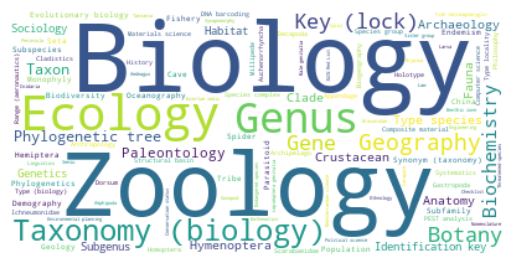

In [107]:
wordcloud_concepts_json(eujot, "eujot_wordcloud_of_concepts")

In [110]:
eu_insects = pd.read_pickle("./data/insect_order_EU27_WoS_method_all_articles.pkl")
eu_insects

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,primary_location,host_venue,...,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,is_authors_truncated,order
0,https://openalex.org/W2075105050,https://doi.org/10.3897/zookeys.186.2947,New species and distributional records of Aleo...,New species and distributional records of Aleo...,190.501050,2012,2012-04-26,{'openalex': 'https://openalex.org/W2075105050...,"{'is_oa': True, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S199213172', 'iss...",...,"[https://openalex.org/W239374901, https://open...","[https://openalex.org/W1994200612, https://ope...",https://api.openalex.org/works/W2075105050/ngrams,"{'The': [0, 118, 155], 'Aleocharinae': [1, 112...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2021, 'cited_by_count': 1}, {'year':...",2023-02-07T17:28:00.684842,2016-06-24,NaN,Coleoptera
1,https://openalex.org/W2074050863,https://doi.org/10.3897/zookeys.250.3715,Introduction of the Exocelina ekari-group with...,Introduction of the Exocelina ekari-group with...,138.719540,2012,2012-12-13,{'openalex': 'https://openalex.org/W2074050863...,"{'is_oa': True, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S199213172', 'iss...",...,"[https://openalex.org/W283890424, https://open...","[https://openalex.org/W2074050863, https://ope...",https://api.openalex.org/works/W2074050863/ngrams,"{'The': [0, 23, 139], 'Exocelina': [1, 42, 46,...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 1}, {'year':...",2023-02-07T12:28:37.348917,2016-06-24,NaN,Coleoptera
2,https://openalex.org/W2124627356,https://doi.org/10.3161/000345411x622525,A New Species ofHenosepilachnaLi (Coleoptera: ...,A New Species ofHenosepilachnaLi (Coleoptera: ...,120.628450,2011,2011-12-01,{'openalex': 'https://openalex.org/W2124627356...,"{'is_oa': None, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S24891482', 'issn...",...,"[https://openalex.org/W252341036, https://open...","[https://openalex.org/W1975229913, https://ope...",https://api.openalex.org/works/W2124627356/ngrams,"{'Abstract.': [0], 'Henosepilachna': [1, 14], ...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 1}, {'year':...",2023-02-07T13:34:06.874373,2016-06-24,NaN,Coleoptera
3,https://openalex.org/W2470267224,https://doi.org/10.1017/jpa.2016.51,New species from Late Cretaceous New Jersey am...,New species from Late Cretaceous New Jersey am...,115.585010,2016,2016-08-23,{'openalex': 'https://openalex.org/W2470267224...,"{'is_oa': None, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/V143791635', 'iss...",...,"[https://openalex.org/W1492713357, https://ope...","[https://openalex.org/W1581826312, https://ope...",https://api.openalex.org/works/W2470267224/ngrams,"{'Abstract': [0], 'A': [1], 'new': [2, 105], '...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2022, 'cited_by_count': 2}, {'year':...",2023-02-02T10:14:06.454186,2016-07-22,NaN,Coleoptera
4,https://openalex.org/W2297951136,https://doi.org/10.3897/zookeys.572.6763,A contribution to the knowledge of the mountai...,A contribution to the knowledge of the mountai...,111.848610,2016,2016-03-15,{'openalex': 'https://openalex.org/W2297951136...,"{'is_oa': True, 'landing_page_url': 'https://d...","{'id': 'https://openalex.org/S199213172', 'iss...",...,"[https://openalex.org/W1539113718, https://ope...","[https://openalex.org/W1929083957, https://ope...",https://api.openalex.org/works/W2297951136/ngrams,"{'Recent': [0], 'intensive': [1], 'samplings':...",https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2021, 'cited_by_count': 3}, {'year':...",2023-02-08T02:17:30.944222,2016-06-24,NaN,Coleoptera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,https://openalex.org/W3000603933,https

In [111]:
n_taxon = {}
n_taxonomy = {}
n_bioclass = {}
n_tax = {}
n_total = {}

for order in set(eu_insects["order"]):
    order_articles = eu_insects[eu_insects["order"]==order]
    
    n_total[order] = len(order_articles.index)
    
    n_taxon[order] = 0
    n_taxonomy[order] = 0
    n_bioclass[order] = 0
    n_tax[order] = 0
    
    for article in order_articles.itertuples():
        taxon = False
        taxonomy = False
        bioclass = False

        for concept in article.concepts:
            if concept["id"] == "https://openalex.org/C71640776":
                taxon = True
            elif concept["id"] == "https://openalex.org/C58642233":
                taxonomy = True
            elif concept["id"] == "https://openalex.org/C48702757":
                bioclass = True

        if taxon and not taxonomy:
            n_taxon[order] += 1
        if taxonomy and not taxon:
            n_taxonomy[order] += 1
        elif taxon and taxonomy:
            n_tax[order] += 1
        
        if bioclass:
            n_bioclass[order] += 1

In [113]:
n_bioclass

{'Zoraptera': 0,
 'Raphidioptera': 0,
 'Isoptera': 0,
 'Ephemeroptera': 0,
 'Mecoptera': 0,
 'Embioptera': 0,
 'Trichoptera': 0,
 'Diptera': 0,
 'Thysanoptera': 0,
 'Archaeognatha': 0,
 'Zygentoma': 0,
 'Psocodea': 0,
 'Blattodea': 0,
 'Lepidoptera': 0,
 'Megaloptera': 0,
 'Orthoptera': 0,
 'Hemiptera': 0,
 'Mantophasmatodea': 0,
 'Strepsiptera': 0,
 'Dermaptera': 0,
 'Neuroptera': 0,
 'Coleoptera': 0,
 'Hymenoptera': 0,
 'Mantodea': 0,
 'Grylloblattodea': 0,
 'Odonata': 0,
 'Plecoptera': 0,
 'Siphonaptera': 0,
 'Phasmida': 0}

In [114]:
data_plot = pd.DataFrame({"both":n_tax, "taxon":n_taxon, "taxonomy":n_taxonomy, "total":n_total})
data_plot

,both,taxon,taxonomy,total
Zoraptera,2,5,6,14
Raphidioptera,0,0,1,11
Isoptera,1,4,1,34
Ephemeroptera,10,25,20,113
Mecoptera,0,2,1,18
Embioptera,1,2,2,6
Trichoptera,3,41,38,177
Diptera,53,111,340,1272
Thysanoptera,0,0,3,31
Archaeognatha,2,3,3,10


In [116]:
data_plot["both_perc"] = data_plot["both"] / data_plot["total"]
data_plot["taxon_perc"] = data_plot["taxon"] / data_plot["total"]
data_plot["taxonomy_perc"] = data_plot["taxonomy"] / data_plot["total"]

data_plot

,both,taxon,taxonomy,total,both_perc,taxon_perc,taxonomy_perc
Zoraptera,2,5,6,14,0.142857,0.357143,0.428571
Raphidioptera,0,0,1,11,0.000000,0.000000,0.090909
Isoptera,1,4,1,34,0.029412,0.117647,0.029412
Ephemeroptera,10,25,20,113,0.088496,0.221239,0.176991
Mecoptera,0,2,1,18,0.000000,0.111111,0.055556
Embioptera,1,2,2,6,0.166667,0.333333,0.333333
Trichoptera,3,41,38,177,0.016949,0.231638,0.214689
Diptera,53,111,340,1272,0.041667,0.087264,0.267296
Thysanoptera,0,0,3,31,0.000000,0.000000,0.096774
Archaeognatha,2,3,3,10,0.200000,0.300000,0.300000


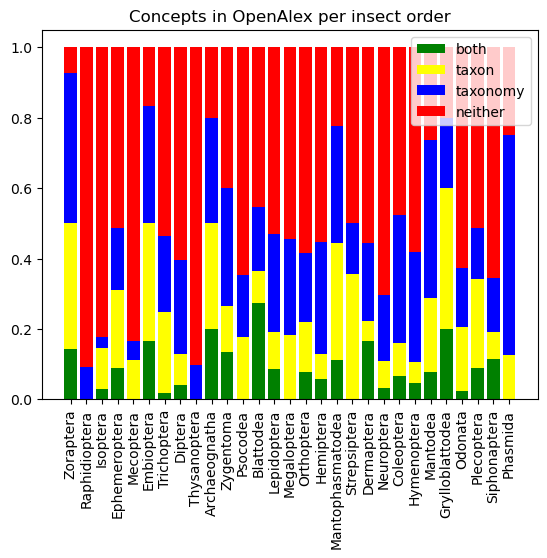

<Figure size 640x480 with 0 Axes>

In [121]:
labels = list(n_taxon.keys())
fig, ax = plt.subplots()

ax.bar(labels, data_plot["both_perc"],
       label="both", color="green")
ax.bar(labels, data_plot["taxon_perc"], bottom=data_plot["both_perc"],
       label="taxon", color="yellow")
ax.bar(labels, data_plot["taxonomy_perc"], bottom=data_plot["both_perc"]+data_plot["taxon_perc"],
       label="taxonomy", color="blue")
ax.bar(labels, 1-data_plot["both_perc"]-data_plot["taxon_perc"]-data_plot["taxonomy_perc"], 
       bottom=data_plot["both_perc"]+data_plot["taxon_perc"]+data_plot["taxonomy_perc"],
       label="neither", color="red")

ax.legend()

plt.title("Concepts in OpenAlex per insect order")
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.show()

plt.savefig("./figures/concepts_insect_orders.png")

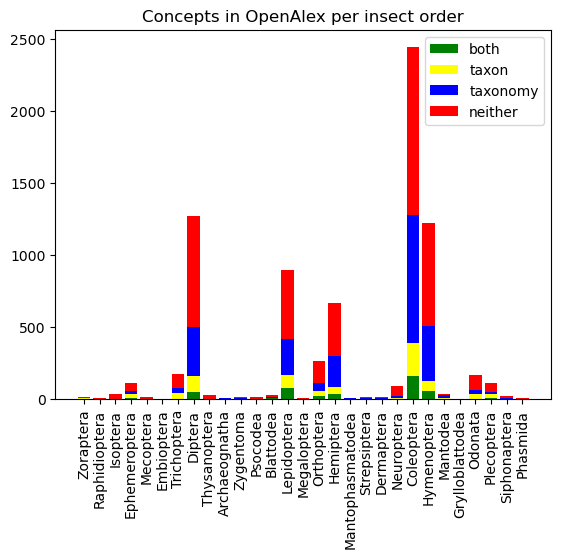

<Figure size 640x480 with 0 Axes>

In [125]:
labels = list(n_taxon.keys())
fig, ax = plt.subplots()

ax.bar(labels, data_plot["both"],
       label="both", color="green")
ax.bar(labels, data_plot["taxon"], bottom=data_plot["both"],
       label="taxon", color="yellow")
ax.bar(labels, data_plot["taxonomy"], bottom=data_plot["both"]+data_plot["taxon"],
       label="taxonomy", color="blue")
ax.bar(labels, data_plot["total"]-data_plot["both"]-data_plot["taxon"]-data_plot["taxonomy"], 
       bottom=data_plot["both"]+data_plot["taxon"]+data_plot["taxonomy"],
       label="neither", color="red")

ax.legend()

plt.title("Concepts in OpenAlex per insect order")
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.show()

plt.savefig("./figures/concepts_insect_orders.png")